<a href="https://colab.research.google.com/github/Gabrielcidral1/wine1/blob/main/Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

from plotnine import ggplot, aes, geom_boxplot, ggtitle, scale_x_continuous, geom_point, geom_smooth, geom_boxplot, geom_col

In [ ]:


df = pd.read_csv("/content/drive/MyDrive/AI Driven Analyst/Aula 1/wine_data_large.csv")


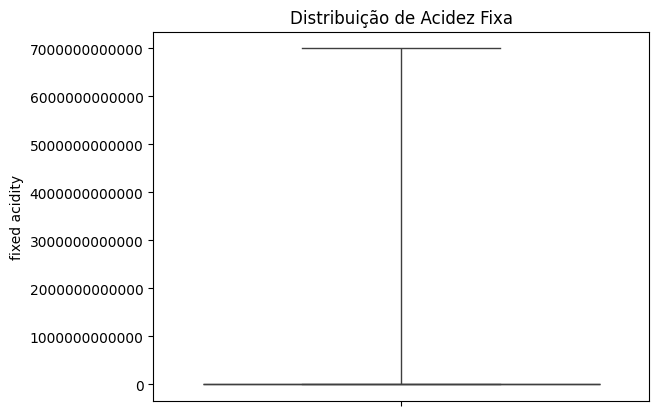

In [ ]:


import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

sns.boxplot(data=df,  y='fixed acidity', whis=[0, 100])
plt.title("Distribuição de Acidez Fixa")
ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.ticklabel_format(style='plain', axis='y')
plt.show()

In [ ]:
df['fixed acidity'].describe()

,fixed acidity
count,1.299400e+04
mean,1.077420e+09
std,8.684102e+10
min,3.800000e+00
25%,6.400000e+00
50%,7.000000e+00
75%,7.700000e+00
max,7.000000e+12


In [ ]:
numerical_df = df.select_dtypes(include=['number'])

mean_values = numerical_df.mean()
std_values = numerical_df.std()

Mean values:
 fixed acidity           1.077420e+09
volatile acidity        3.396660e-01
citric acid             3.186332e-01
residual sugar          5.443235e+00
chlorides               5.603386e-02
free sulfur dioxide     3.052532e+01
total sulfur dioxide    1.157446e+02
density                 9.946966e-01
pH                      3.218501e+00
sulphates               5.312683e-01
alcohol                 1.049180e+01
quality                 5.818378e+00
id                      3.249000e+03
dtype: float64

Standard deviation values:
 fixed acidity           8.684102e+10
volatile acidity        1.646301e-01
citric acid             1.453123e-01
residual sugar          4.757621e+00
chlorides               3.503225e-02
free sulfur dioxide     1.774872e+01
total sulfur dioxide    5.651968e+01
density                 2.998558e-03
pH                      1.607810e-01
sulphates               1.488001e-01
alcohol                 1.192666e+00
quality                 8.732217e-01
id               

In [ ]:
mean_df = mean_values.reset_index()
std_df = std_values.reset_index()

merged_df = pd.merge(mean_df, std_df, on='index')

merged_df.columns = ['variable', 'mean', 'std']

display(merged_df)

,variable,mean,std
0,fixed acidity,1.077420e+09,8.684102e+10
1,volatile acidity,3.396660e-01,1.646301e-01
2,citric acid,3.186332e-01,1.453123e-01
3,residual sugar,5.443235e+00,4.757621e+00
4,chlorides,5.603386e-02,3.503225e-02
5,free sulfur dioxide,3.052532e+01,1.774872e+01
6,total sulfur dioxide,1.157446e+02,5.651968e+01
7,density,9.946966e-01,2.998558e-03
8,pH,3.218501e+00,1.607810e-01
9,sulphates,5.312683e-01,1.488001e-01


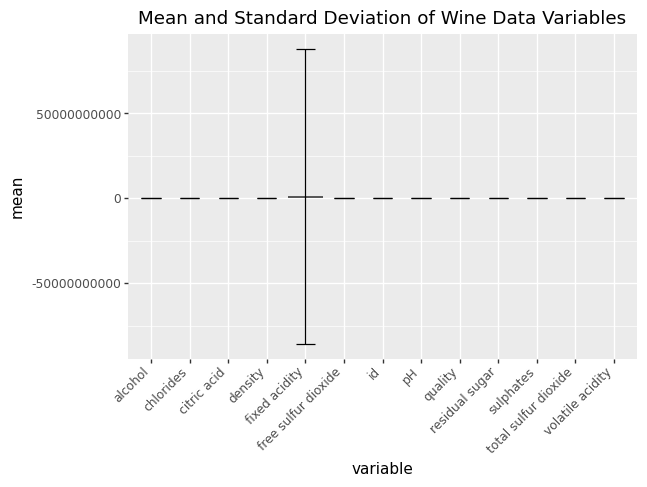

In [ ]:
from plotnine import geom_bar, geom_errorbar, theme, element_text

(
    ggplot(merged_df, aes(x='variable', y='mean'))
    + geom_bar(stat='identity')
    + geom_errorbar(aes(ymin='mean - std', ymax='mean + std'))
    + ggtitle("Mean and Standard Deviation of Wine Data Variables")
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
).draw()

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AI Driven Analyst/Aula 1/wine_data.csv")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,3
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,4
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,6493
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,6494
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,6495
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,6496


In [ ]:
(df
 .select_dtypes(include=['number'])
 .corr()['quality']
 .sort_values(ascending = False)
 .drop('quality'))

,quality
alcohol,0.444319
id,0.113359
citric acid,0.085532
free sulfur dioxide,0.055463
sulphates,0.038485
pH,0.019506
residual sugar,-0.036980
total sulfur dioxide,-0.041385
fixed acidity,-0.076743
chlorides,-0.200666


In [ ]:
df['quality'].describe()

,quality
count,6497.000000
mean,5.818378
std,0.873255
min,3.000000
25%,5.000000
50%,6.000000
75%,6.000000
max,9.000000


In [ ]:
df.sort_values(by = 'quality', ascending = False).head(35)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,id
2475,6.9,0.360,0.34,4.20,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9,white,2476
3204,7.1,0.260,0.49,2.20,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9,white,3205
2373,9.1,0.270,0.45,10.60,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9,white,2374
2419,6.6,0.360,0.29,1.60,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9,white,2420
2426,7.4,0.240,0.36,2.00,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9,white,2427
4352,5.8,0.315,0.27,1.55,0.026,15.0,70.0,0.98994,3.37,0.40,11.9,8,white,4353
4852,5.3,0.300,0.16,4.20,0.029,37.0,100.0,0.99050,3.30,0.36,11.8,8,white,4853
4851,7.1,0.260,0.37,5.50,0.025,31.0,105.0,0.99082,3.06,0.33,12.6,8,white,4852
2382,8.1,0.170,0.44,14.10,0.053,43.0,145.0,1.00060,3.28,0.75,8.8,8,white,2383
4617,6.8,0.220,0.31,6.90,0.037,33.0,121.0,0.99176,3.02,0.39,11.9,8,white,4618


In [ ]:
df_agg = (df
 .pivot_table(values = 'id', index = 'quality', aggfunc = 'count', columns='type', fill_value=0)
 .sort_values(by='quality', ascending = False)
)

In [ ]:
df_agg.reset_index()

type,quality,red,white
0,9,0,5
1,8,18,175
2,7,199,880
3,6,638,2198
4,5,681,1457
5,4,53,163
6,3,10,20


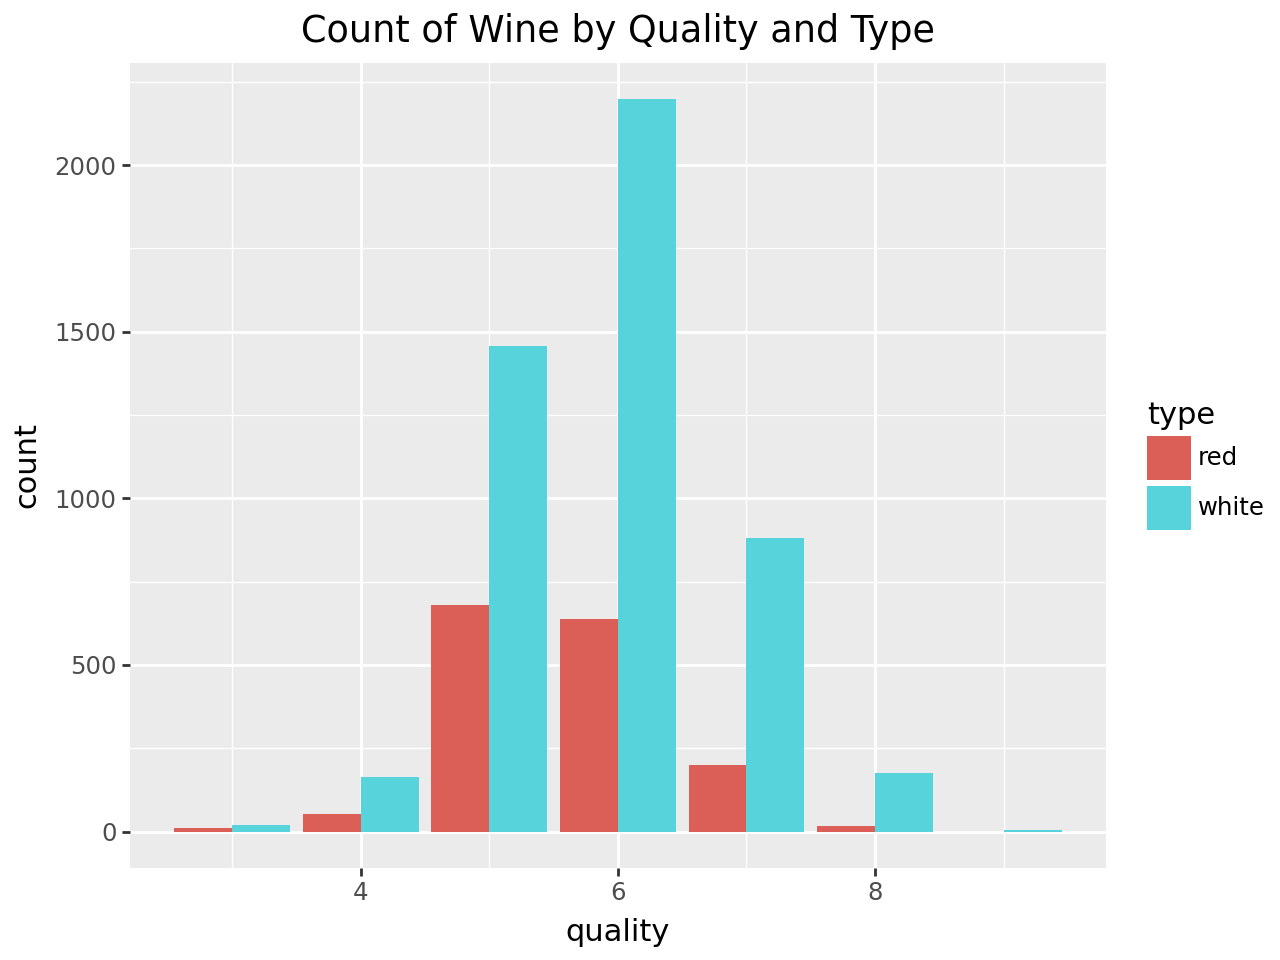

In [ ]:
from plotnine import ggplot, aes, geom_col, position_dodge

df_agg_melted = df_agg.reset_index().melt(id_vars='quality', var_name='type', value_name='count')

(
    ggplot(df_agg_melted, aes(x='quality', y='count', fill='type'))
    + geom_col(position=position_dodge(width=0.9))
    + ggtitle("Count of Wine by Quality and Type")
)